In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install seaborn

     |████████████████████████████████| 225kB 239kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data_train=pd.read_csv('fashion-mnist_train.csv',sep=',')

In [20]:
data_test=pd.read_csv('fashion-mnist_test.csv',sep=',')

visualization of the datasets

In [21]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data_train.shape

(60000, 785)

In [29]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data_test.shape

(10000, 785)

In [31]:
training = np.array(data_train,dtype='float32')

In [74]:
training[2]

array([  6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,
         0., 105.,  92., 101., 107., 100., 132.,   0.,   0.,   2.,   4.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 150., 227., 211., 171., 191.,
       236., 228., 172.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  48., 153.,
       209., 210., 187., 199., 142., 157., 209., 179., 199., 233., 138.,
        44.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 120., 218., 215., 207., 198., 198., 223., 219.,
       214., 225., 190., 177., 195., 209., 204., 139.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 208., 200.,
       197., 202., 193., 203., 207., 228., 245., 196., 197., 202., 193.,
       190., 167., 203.,  27.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  89., 217., 200., 211., 17

In [34]:
testing = np.array(data_test,dtype='float32')

4.0

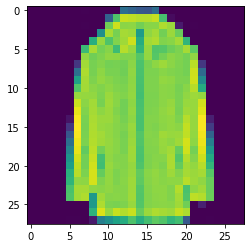

In [44]:
import random
i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label

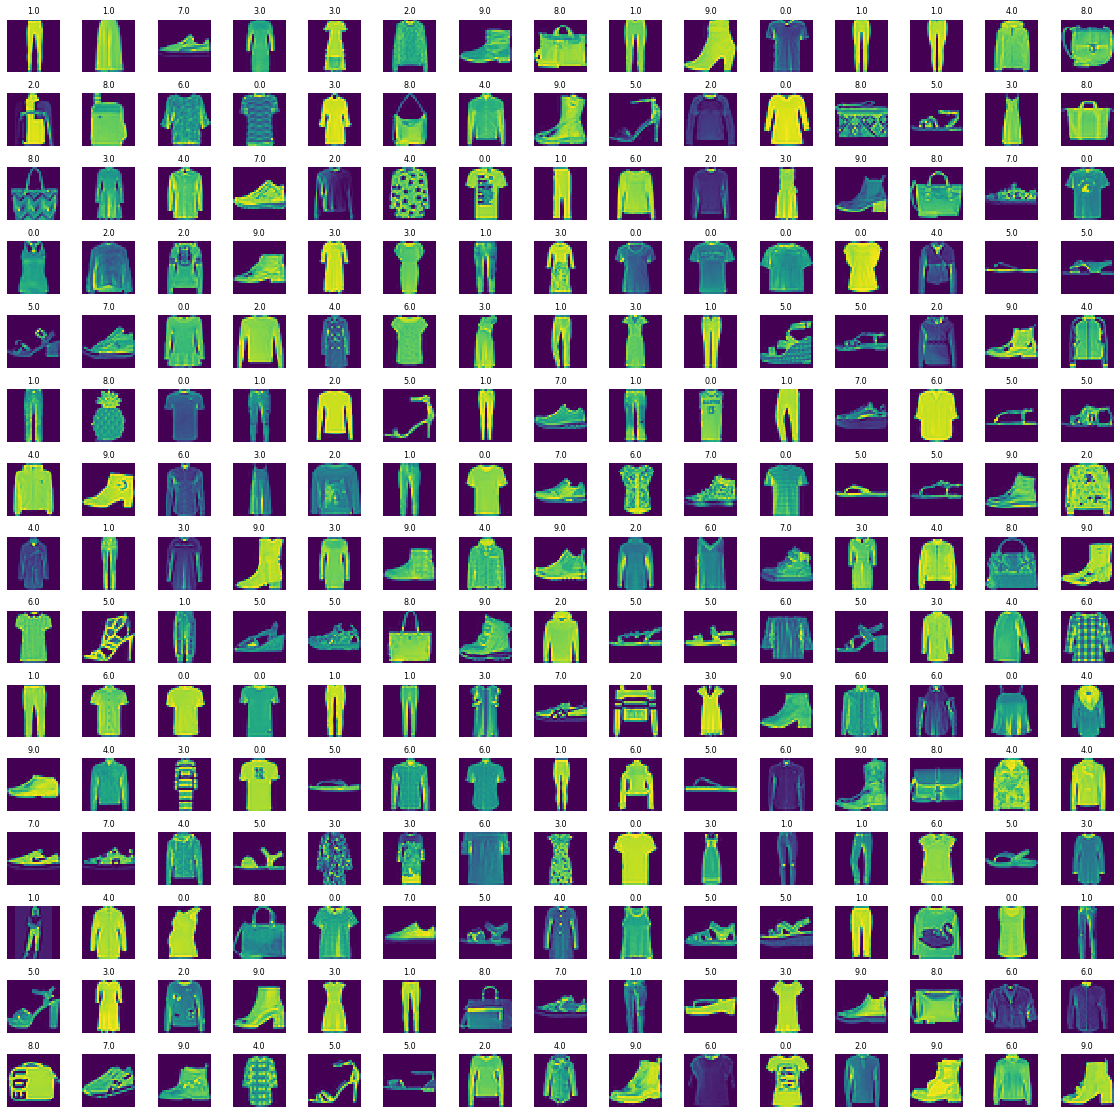

In [75]:
#Let's view more images in grid format
#Define the dimension of the plot grid 
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid,w_grid,figsize=(20,20))
axes = axes.ravel() #flaten the 15*15 matrix into 255 array

n_training = len(training)

for i in np.arange(0,w_grid * l_grid): #create evenly spaces variable
    
    #select a random number
    index = np.random.randint(0,n_training)
    #read and display an image with the selected order
    
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [50]:
x_train = training[:,1:]/255
y_train = training[:,0]

In [51]:
x_test = testing[:,1:]/255
y_test = testing[:,0]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size=0.2,random_state=12345) 

In [55]:
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [58]:
cnn_model = Sequential()

In [59]:
cnn_model.add(Conv2D(32, 3, 3, input_shape= (28,28,1),activation='relu'))

/home/kapil/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [60]:
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim=32,activation='relu'))
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))

/home/kapil/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kapil/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  after removing the cwd from sys.path.


In [61]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])


In [62]:
epochs=50


In [63]:
cnn_model.fit(x_train,y_train,batch_size=512,nb_epoch=epochs,verbose=1,validation_data=(x_validate,y_validate))

/home/kapil/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 37s 779us/step - loss: 0.9789 - acc: 0.6849 - val_loss: 0.5290 - val_acc: 0.8082
Epoch 2/50
48000/48000 [==============================] - 34s 716us/step - loss: 0.4749 - acc: 0.8328 - val_loss: 0.4367 - val_acc: 0.8469
Epoch 3/50
48000/48000 [==============================] - 33s 698us/step - loss: 0.4127 - acc: 0.8544 - val_loss: 0.4052 - val_acc: 0.8556
Epoch 4/50
48000/48000 [==============================] - 36s 742us/step - loss: 0.3848 - acc: 0.8637 - val_loss: 0.3783 - val_acc: 0.8727
Epoch 5/50
48000/48000 [==============================] - 35s 731us/step - loss: 0.3601 - acc: 0.8734 - val_loss: 0.3588 - val_acc: 0.8758
Epoch 6/50
48000/48000 [==============================] - 35s 727us/step - loss: 0.3435 - acc: 0.8788 - val_loss: 0.3369 - val_acc: 0.8832
Epoch 7/50
48000/48000 [==============================] - 36s 743us/step - loss: 0.3255 - acc: 0.8862 - val_loss: 0.

In [64]:
evalution = cnn_model.evaluate(x_test,y_test)
print('test accuracy:{:3f}'.format(evalution[1]))


10000/10000 [==============================] - 6s 648us/step
test accuracy:0.912300


In [65]:
pred = cnn_model.predict_classes(x_test)
pred

array([0, 1, 2, ..., 8, 8, 1])

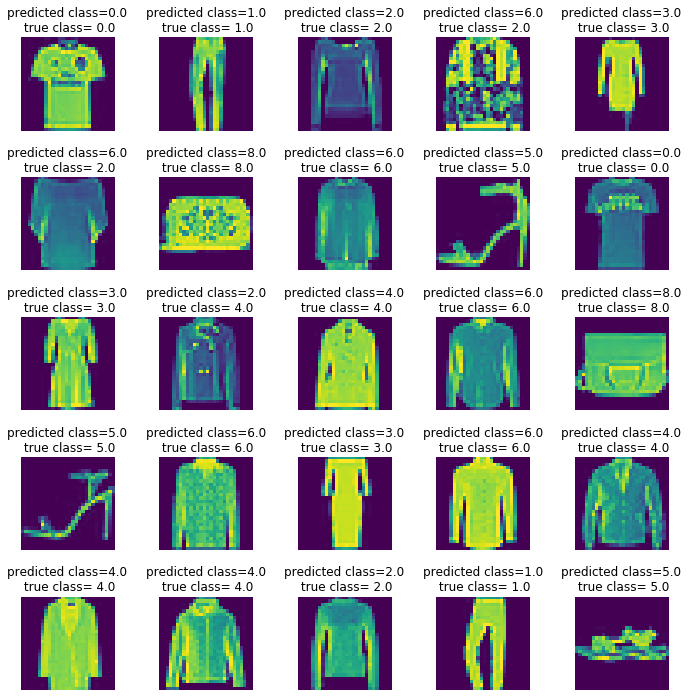

In [69]:
l=5
w=5
fig, axes = plt.subplots(l,w,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title('predicted class={:0.1f}\n true class= {:0.1f}'.format(pred[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

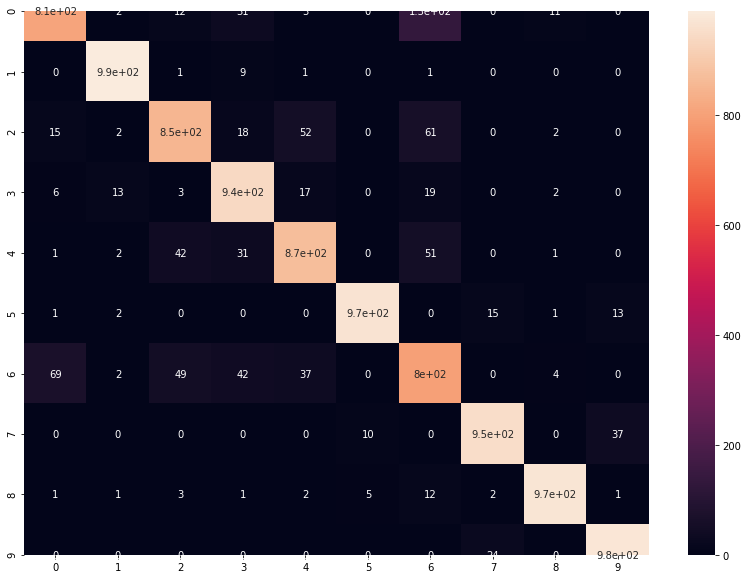

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)
#diagonal element to get the total true correct value

In [72]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['class{}'.format(i) for i in range(num_classes)]

print(classification_report(y_test,pred,target_names=target_names))

              precision    recall  f1-score   support

      class0       0.90      0.81      0.85      1000
      class1       0.98      0.99      0.98      1000
      class2       0.89      0.85      0.87      1000
      class3       0.88      0.94      0.91      1000
      class4       0.89      0.87      0.88      1000
      class5       0.98      0.97      0.98      1000
      class6       0.74      0.80      0.77      1000
      class7       0.96      0.95      0.96      1000
      class8       0.98      0.97      0.98      1000
      class9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
 x  